In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C://Users//Lucas//Desktop//city_data.csv"
ride_data_to_load = "C://Users//Lucas//Desktop//ride_data.csv"


In [2]:
# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

In [3]:
city_data_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [4]:
ride_data_df.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [5]:
city_data_df.head ()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_data_df.head ()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine the data into a single dataset
city_and_ride = pd.merge(ride_data_df, city_data_df, how="left", on="city")
# Display the data table for preview
city_and_ride.head ()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
city_and_ride_urban=city_and_ride[city_and_ride["type"]=="Urban"]
city_and_ride_urban.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 6 columns):
city            1625 non-null object
date            1625 non-null object
fare            1625 non-null float64
ride_id         1625 non-null int64
driver_count    1625 non-null int64
type            1625 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 88.9+ KB


In [9]:
# Split up our data into groups based upon 'type'
city_groups_urban = city_and_ride_urban.groupby(['city'])

# Find out how many rides for each city
rides_per_city_urban = city_groups_urban['ride_id'].count()
rides_per_city_urban.head ()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [10]:
drivers_per_city_urban=city_groups_urban['driver_count'].mean ()
drivers_per_city_urban.head ()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [11]:
fares_per_city_urban=city_groups_urban['fare'].mean ()
fares_per_city_urban.head ()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

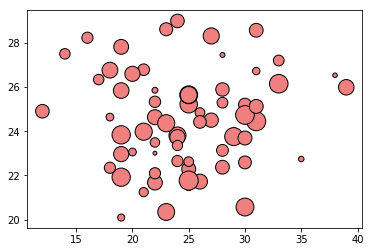

In [12]:
plt.scatter(rides_per_city_urban,fares_per_city_urban, s=5*drivers_per_city_urban, edgecolors="black", facecolors="lightcoral")
plt.show()

In [13]:
city_and_ride_suburban=city_and_ride[city_and_ride["type"]=="Suburban"]
city_and_ride_suburban.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 1625 to 2249
Data columns (total 6 columns):
city            625 non-null object
date            625 non-null object
fare            625 non-null float64
ride_id         625 non-null int64
driver_count    625 non-null int64
type            625 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 34.2+ KB


In [14]:
# Split up our data into groups based upon 'type'
city_groups_suburban = city_and_ride_suburban.groupby(['city'])

# Find out how many rides for each city
rides_per_city_suburban = city_groups_suburban['ride_id'].count()
rides_per_city_suburban.head ()


city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [15]:
drivers_per_city_suburban=city_groups_suburban['driver_count'].mean ()
drivers_per_city_suburban.head ()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

In [16]:
fares_per_city_suburban=city_groups_suburban['fare'].mean ()
fares_per_city_suburban.head ()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

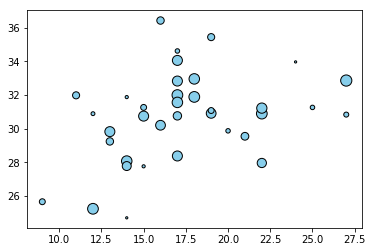

In [17]:
plt.scatter(rides_per_city_suburban,fares_per_city_suburban, s=5*drivers_per_city_suburban, facecolors="skyblue", edgecolors="black")
plt.show()

In [18]:
city_and_ride_rural=city_and_ride[city_and_ride["type"]=="Rural"]
city_and_ride_rural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 2250 to 2374
Data columns (total 6 columns):
city            125 non-null object
date            125 non-null object
fare            125 non-null float64
ride_id         125 non-null int64
driver_count    125 non-null int64
type            125 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 6.8+ KB


In [19]:
# Split up our data into groups based upon 'type'
city_groups_rural = city_and_ride_rural.groupby(['city'])

# Find out how many rides for each city
rides_per_city_rural = city_groups_rural['ride_id'].count()
rides_per_city_rural.head ()


city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [20]:
drivers_per_city_rural=city_groups_rural['driver_count'].mean ()
drivers_per_city_rural.head ()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

In [21]:
fares_per_city_rural=city_groups_rural['fare'].mean ()
fares_per_city_rural.head ()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

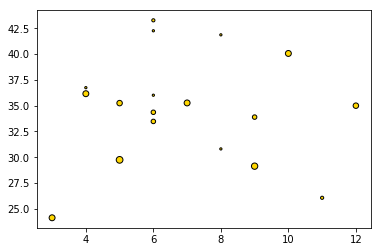

In [22]:
plt.scatter(rides_per_city_rural,fares_per_city_rural, s=5*drivers_per_city_rural, facecolors="gold", edgecolors="black")
plt.show()

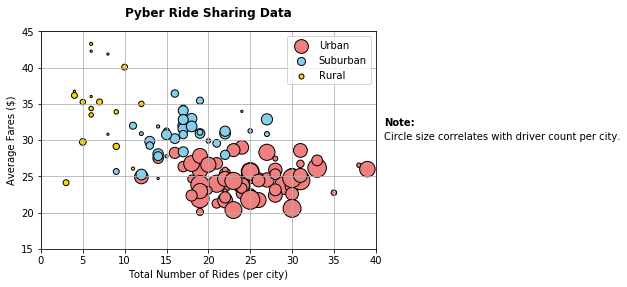

In [23]:
urban_one=plt.scatter(rides_per_city_urban,fares_per_city_urban, s=5*drivers_per_city_urban, 
                      edgecolors="black", facecolors="lightcoral", label="Urban")

suburban_one=plt.scatter(rides_per_city_suburban,fares_per_city_suburban, s=5*drivers_per_city_suburban, 
                         facecolors="skyblue", edgecolors="black", label="Suburban")

rural_one=plt.scatter(rides_per_city_rural,fares_per_city_rural, s=5*drivers_per_city_rural, facecolors="gold", 
                      edgecolors="black", label="Rural")


plt.legend(handles=[urban_one,suburban_one,rural_one], loc="best")
plt.text(41,32,"Note:", weight="bold")
plt.text(41,30,"Circle size correlates with driver count per city.")

plt.xlim(0,40)
plt.ylim(15,45)

plt.text(10,47,"Pyber Ride Sharing Data",weight="bold", size="12")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fares ($)")
plt.grid()



# Incorporate a text label regarding circle size



In [24]:
total_fares = city_and_ride["fare"].sum()
total_fares

63538.64

In [25]:
sum_by_type = city_and_ride.groupby(["type"]).sum()
sum_by_type


,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [26]:
urban_count=sum_by_type ["fare"][2]
suburban_count=sum_by_type ["fare"][1]
rural_count=sum_by_type ["fare"][0]

In [27]:
total_count = urban_count+suburban_count+rural_count

In [28]:
# Calculate Type Percents
up=urban_count/total_count
sp=suburban_count/total_count
rp=rural_count/total_count

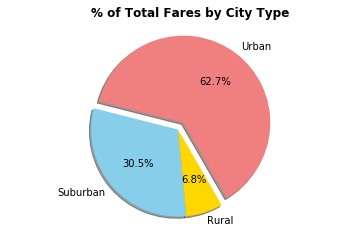

In [39]:
# Build Pie Chart
types=["Urban", "Suburban", "Rural"]
type_percents= [up, sp, rp]
colors = ["lightcoral","skyblue","gold"]
explode = (0.1,0,0)

plt.axis("equal")

plt.pie(type_percents, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)

#plt.title("% of Total Fares by City Type")
plt.text(-1,1.3,"% of Total Fares by City Type",weight="bold", size="12")

plt.savefig("./Images.png")
plt.show()

In [30]:
 # Calculate Ride Percents
uride_count=len(city_and_ride_urban["city"])
sride_count=len(city_and_ride_suburban["city"])
rride_count=len(city_and_ride_rural["city"])

In [31]:
ride_total=uride_count+sride_count+rride_count
ride_total

2375

In [32]:
ur=uride_count/ride_total
sr=sride_count/ride_total
rr=rride_count/ride_total

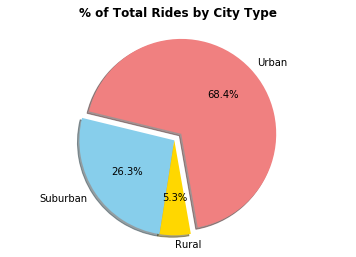

In [33]:
# Build Pie Chart

types=["Urban", "Suburban", "Rural"]
ride_percents= [ur, sr, rr]
colors = ["lightcoral","skyblue","gold"]
explode = (0.1,0,0)

plt.pie(ride_percents, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)

plt.axis("equal")

#plt.title("% of Total Rides by City Type")
plt.text(-1,1.3,"% of Total Rides by City Type",weight="bold", size="12")

plt.savefig("./Images.png")
plt.show()

In [34]:
 # Calculate Driver Percents
driver_urban_count=sum_by_type ["driver_count"][2]
driver_suburban_count=sum_by_type ["driver_count"][1]
driver_rural_count=sum_by_type ["driver_count"][0]

In [35]:
driver_total=driver_urban_count+driver_suburban_count+driver_rural_count
driver_total

68709

In [36]:
driver_urban_count

59602

In [37]:
dup=driver_urban_count/driver_total
dsp=driver_suburban_count/driver_total
drp=driver_rural_count/driver_total

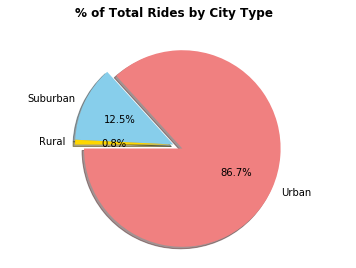

In [40]:
# Build Pie Chart
types=["Urban", "Suburban", "Rural"]
driver_percents= [dup, dsp, drp]
colors = ["lightcoral","skyblue","gold"]
explode = (0.1,0,0)

plt.pie(driver_percents, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.axis("equal")

#plt.title("% of Total Drivers by City Type")
plt.text(-1,1.3,"% of Total Rides by City Type",weight="bold", size="12") 

plt.savefig("./Images.png")
plt.show()